<a href="https://colab.research.google.com/github/Prophetcze/MPA-MLF/blob/main/Mini_Project/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF Miniproject - Classification of wireless transmitters
Task was to determine the number of wireless transmitters based on the hardware imperfections. We were provided with the dataset of some measured values. The dataset consists of 19200 samples and 9 features in total.

In [1]:
# Import of used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Loading the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
path_to_dataset = '/content/drive/MyDrive/Data/Data_prepared_final.csv'

dataset = pd.read_csv(path_to_dataset)

dataset = dataset.iloc[:,2:] # Ignoring first two columns

Mounted at /content/drive


In [3]:
# Printing the dataset to see what we loaded
dataset

,cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...
19195,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


In [4]:
# Adding scaler
scaler = StandardScaler()
dataset_normalized = scaler.fit_transform(dataset)

In [5]:
# Function for finding elbow point for subsequent display in the graph
def find_elbow_point(x, y):
    dy = np.diff(y)
    ddy = np.diff(dy)

    elbow_index = np.argmax(ddy) + 1

    return x[elbow_index], y[elbow_index]

In [6]:
# Code for K-Means computation algorithm
k_all = range(1, 30)   # Range of K-Means
all_objective = []

for k in k_all:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dataset_normalized)
    all_objective.append(kmeans.inertia_)

    # Ignoring the warning or future warning messages
    warnings.filterwarnings("ignore")

elbow_k, elbow_objective = find_elbow_point(np.array(k_all), np.array(all_objective))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Sum of squared distance')

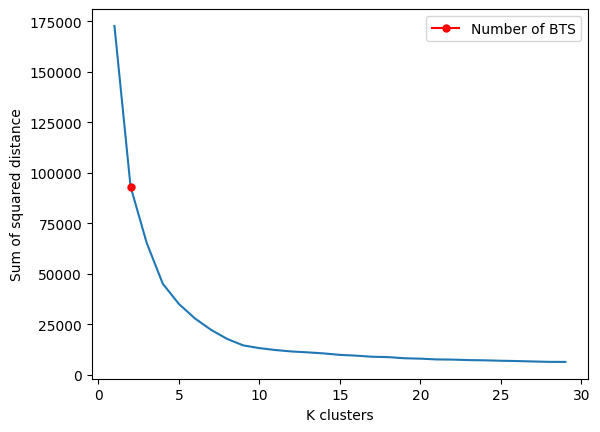

In [7]:
# Showing the results
plt.figure()
plt.plot(k_all, all_objective)
plt.plot(elbow_k, elbow_objective, marker='o', markersize=5, label='Number of BTS', color='red')
plt.xlabel('K clusters')
plt.legend()
plt.ylabel('Sum of squared distance')